# Load the data

In [1]:
# Code starts here
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv(filepath_or_buffer=r'C:\Users\SHRIK\Desktop\shrikant\Projects\GreyAtom Projects\Lending Club Loan Prediction\data\Lending.zip',compression='zip',low_memory=False)
X = df.drop(columns={'loan_status'})
y = df['loan_status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=4)

# Data cleaning

In [2]:
# Drop columns with more than 25% missing data

# Finding null values in each column
col = df.isnull().sum()

# Columns to be dropped
col_drop = col[col>0.25*len(df)].index.tolist()
print(col_drop)
# Columns having only one unique value
for x in df:
    if df[x].nunique() == 1 :
        col_drop.append(x)
X_train = X_train.drop(col_drop,1)
X_test = X_test.drop(col_drop,1)
X_train.head()

['id', 'member_id', 'url', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
169432,12000.0,12000.0,12000.0,36 months,6.03%,365.23,A,A1,Texas Tech HSC School of Nursing,10+ years,...,0.0,0.0,Jul-2015,370.24,Nov-2018,0.0,0.0,NaN,NaN,NaN
24339,15000.0,15000.0,15000.0,60 months,15.61%,361.67,C,C3,Teacher,7 years,...,0.0,0.0,Mar-2018,3110.51,Nov-2018,0.0,0.0,0.0,128366.0,50500.0
80530,9000.0,9000.0,9000.0,36 months,9.71%,289.19,B,B1,Ceres Pipe & Metal,10+ years,...,0.0,0.0,Apr-2016,1146.68,Nov-2018,0.0,0.0,0.0,23772.0,18000.0
135784,10000.0,10000.0,10000.0,36 months,13.11%,337.47,B,B4,MCM Custom Vehicles,10+ years,...,0.0,0.0,May-2013,9176.71,May-2014,0.0,0.0,0.0,350323.0,11500.0
176298,12175.0,12175.0,12100.0,36 months,17.27%,435.71,D,D1,NaN,NaN,...,0.0,0.0,Sep-2013,7981.44,Jul-2017,0.0,0.0,NaN,NaN,NaN


In [3]:
X_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
130852,6625.0,6625.0,6625.0,36 months,10.16%,214.27,B,B1,CHILDREN HOSPITAL OAKLAND,10+ years,...,0.0,0.0,Jan-2016,214.19,Nov-2018,0.0,0.0,0.0,611755.0,22500.0
54717,15875.0,15875.0,15875.0,60 months,24.89%,464.93,F,F4,presbyterian hospital,9 years,...,0.0,0.0,Oct-2018,502.69,Oct-2018,0.0,0.0,0.0,53166.0,20700.0
169162,14500.0,14500.0,14325.0,36 months,6.03%,441.32,A,A1,University of Akron,5 years,...,0.0,0.0,Mar-2015,2191.13,Sep-2017,0.0,0.0,NaN,NaN,NaN
29678,13225.0,13225.0,13225.0,36 months,15.10%,459.10,C,C2,Behavioral health specialist,1 year,...,0.0,0.0,Mar-2015,7978.29,Mar-2015,0.0,0.0,0.0,41318.0,6800.0
83453,5000.0,5000.0,5000.0,36 months,12.12%,166.36,B,B3,Tallahassee memorial,7 years,...,0.0,0.0,Nov-2015,1293.45,Nov-2018,0.0,0.0,0.0,78299.0,12800.0


# Multiclass to binary class
## Observation
Below we can see that in the target variable loan_status there are six classes. We want to convert these six classes to two classes. So we put Fully Paid and Current as one class as it is very unlikely that these will be defaulters and the rest to the other class.

In [4]:
import numpy as np
# training data
y_train = np.where((y_train == 'Fully Paid') | (y_train == 'Current') , 0, 1)             
# testing data
y_test = np.where((y_test == 'Fully Paid') | (y_test == 'Current') , 0, 1)

# Missing values and Encoding categorical variables

In [5]:
from sklearn.preprocessing import LabelEncoder


# categorical and numerical variables
cat = X_train.select_dtypes(include = 'O').columns.tolist()
num = X_train.select_dtypes(exclude = 'O').columns.tolist()

# Filling missing values

# Train Data

for x in cat:
    mode = X_train[x].mode()[0]
    X_train[x].fillna(mode, inplace = True)

for x in num:
    mean = X_train[x].mean()
    X_train[x].fillna(mean,inplace = True)

# Test Data
for x in cat:
    mode = X_train[x].mode()[0]
    X_test[x].fillna(mode,inplace = True)

for x in num:
    mean = X_train[x].mean()
    X_test[x].fillna(mean,inplace = True)


# Label encoding

le = LabelEncoder()
for x in cat:
    
    X_train[x] = le.fit_transform(X_train[x])
    X_test[x] = le.fit_transform(X_test[x])

# Random Forest

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[39705     0]
 [ 6289  1052]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     39705
           1       1.00      0.14      0.25      7341

   micro avg       0.87      0.87      0.87     47046
   macro avg       0.93      0.57      0.59     47046
weighted avg       0.88      0.87      0.82     47046



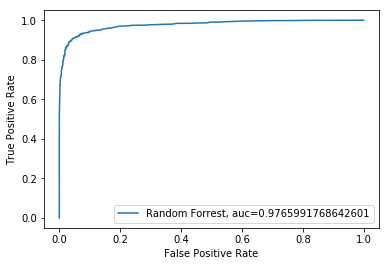

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

# rf = RandomForestClassifier()

rf = RandomForestClassifier(random_state= 42,max_depth=2,min_samples_leaf=5000)

rf.fit(X_train,y_train)

accuracy = rf.score(X_test,y_test)

y_pred = rf.predict(X_test)

# Store the different evaluation values.

f1 = f1_score(y_test, rf.predict(X_test))
precision = precision_score(y_test, rf.predict(X_test))
recall = recall_score(y_test, rf.predict(X_test))
roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))



# Plot the auc-roc curve

score = roc_auc_score(y_pred , y_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Random Forrest, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# XG Boost

[[39705     0]
 [  452  6889]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     39705
           1       1.00      0.94      0.97      7341

   micro avg       0.99      0.99      0.99     47046
   macro avg       0.99      0.97      0.98     47046
weighted avg       0.99      0.99      0.99     47046



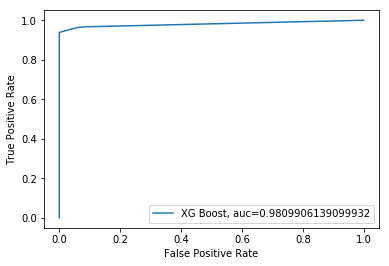

In [8]:
from xgboost import XGBClassifier

# Instantiate the  XGBoost model
xgb = XGBClassifier(learning_rate=0.0001)

# Fit the model on train

xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

# Store the different evaluation values.

f1 = f1_score(y_test, xgb.predict(X_test))
precison = precision_score(y_test, xgb.predict(X_test))
recall = recall_score(y_test, xgb.predict(X_test))
roc_auc = roc_auc_score(y_test, xgb.predict(X_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


# Plot the auc-roc curve

score = roc_auc_score(y_test,y_pred)
y_pred_proba = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="XG Boost, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()